<a href="https://colab.research.google.com/github/Meenzm/AIProject/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load data
file_path = "/Updated_Unique_Tourist.csv"
df = pd.read_csv(file_path)

# Define months list
months = ["January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"]

# Function to extract months from "Best Time to Visit"
def extract_months(time_str):
    selected_months = {month: 0 for month in months}
    for month in months:
        if month in time_str:
            selected_months[month] = 1
    return selected_months

# Apply one-hot encoding for months
df_months = df["Best Time to Visit"].apply(lambda x: extract_months(str(x)))
df_months = pd.DataFrame(df_months.tolist())

# Select other features
features = ["Country", "Famous Attraction", "Attractive Activities"]
df_encoded = pd.get_dummies(df[features])
df_encoded = pd.concat([df_encoded, df_months], axis=1)  # Add month encoding

# Encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["Activity Category"])

# Split data
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.2, random_state=42)

# Define FNN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')  # Output classes
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
predicted_labels = label_encoder.inverse_transform(y_pred_classes)

# Display some predictions
sample_size = 10
sample_indices = np.random.choice(len(X_test), sample_size, replace=False)
print("Sample Predictions:")
for idx in sample_indices:
    country = df.iloc[idx]['Country']
    activity = predicted_labels[idx]
    print(f"ไป {country} เพื่อทำกิจกรรม: {activity}")

# Create heatmap for Best Time to Visit (One-Hot Months) vs Country
plt.figure(figsize=(12, 6))
pivot_table_months = df_months.T @ df["Country"].astype('category').cat.codes.values
sns.heatmap(pivot_table_months, cmap='coolwarm', annot=True, fmt="d")
plt.title('Heatmap of Best Time to Visit (Months) vs Country')
plt.xlabel('Country')
plt.ylabel('Months')
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type bool).

In [ ]:
# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.2652 
Test Accuracy: 1.0000


Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.2744 - loss: 2.1323 - val_accuracy: 0.9875 - val_loss: 1.1909
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9981 - loss: 0.7852 - val_accuracy: 1.0000 - val_loss: 0.1561
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 0.1022 - val_accuracy: 1.0000 - val_loss: 0.0425
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.0000 - loss: 0.0317 - val_accuracy: 1.0000 - val_loss: 0.0202
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 1.0000 - loss: 0.0159 - val_accuracy: 1.0000 - val_loss: 0.0119
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 1.0000 - loss: 0.0095 - val_accuracy: 1.0000 - val_loss: 0.0079
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 1.0000 - loss: 0.0064 - val_accuracy: 1.0000 - val_loss: 0.0056
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 1.0000 - loss: 0.0046 - val_accurac

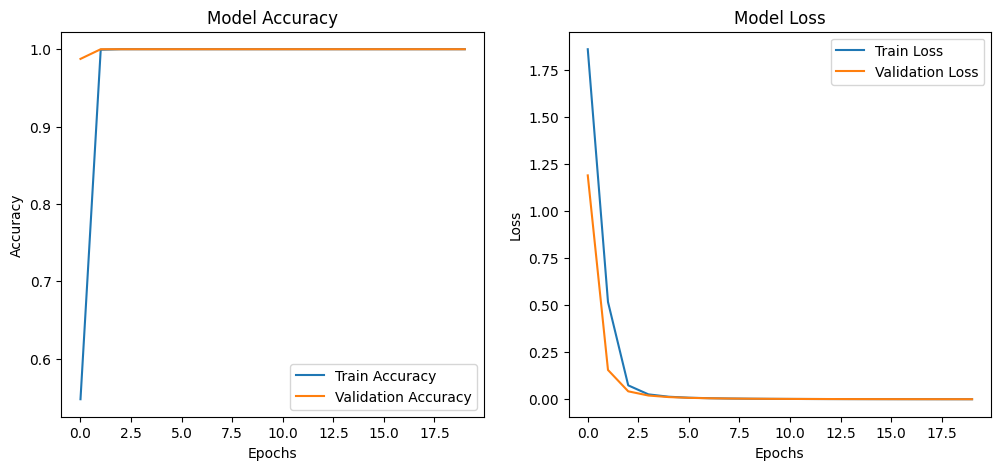

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Sample Predictions:
ไป Russia เพื่อทำกิจกรรม: Urban Leisure Experience
ไป South Africa เพื่อทำกิจกรรม: Nightlife and Gastronomy
ไป Brazil เพื่อทำกิจกรรม: Urban Leisure Experience
ไป Indonesia เพื่อทำกิจกรรม: Wildlife Wonder
ไป Japan เพื่อทำกิจกรรม: Wildlife Wonder
ไป Brazil เพื่อทำกิจกรรม: Festive Heritage
ไป Argentina เพื่อทำกิจกรรม: Nightlife and Gastronomy
ไป Turkey เพื่อทำกิจกรรม: Cultural Hotspot
ไป UAE เพื่อทำกิจกรรม: Metropolitan Elegance
ไป Turkey เพื่อทำกิจกรรม: Metropolitan Elegance


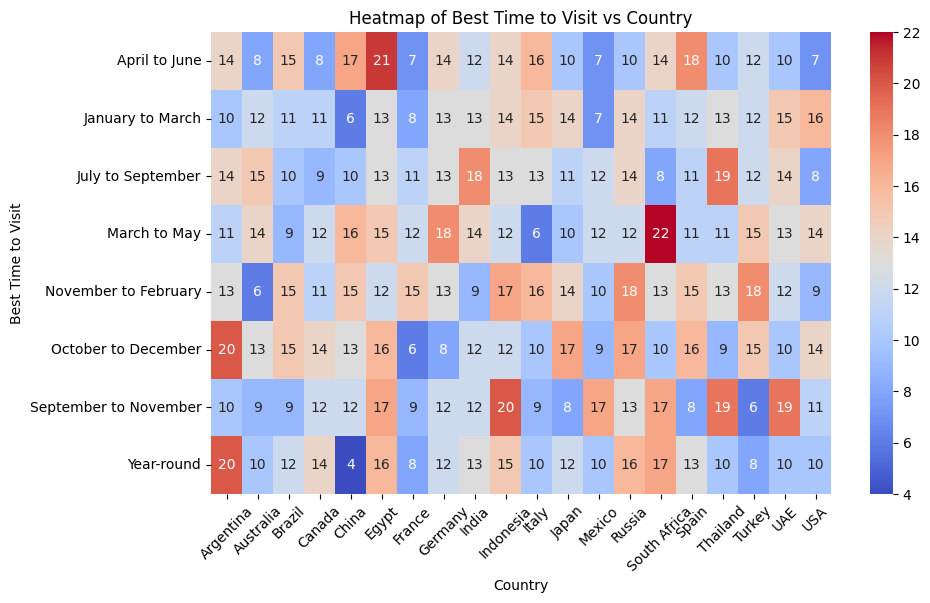

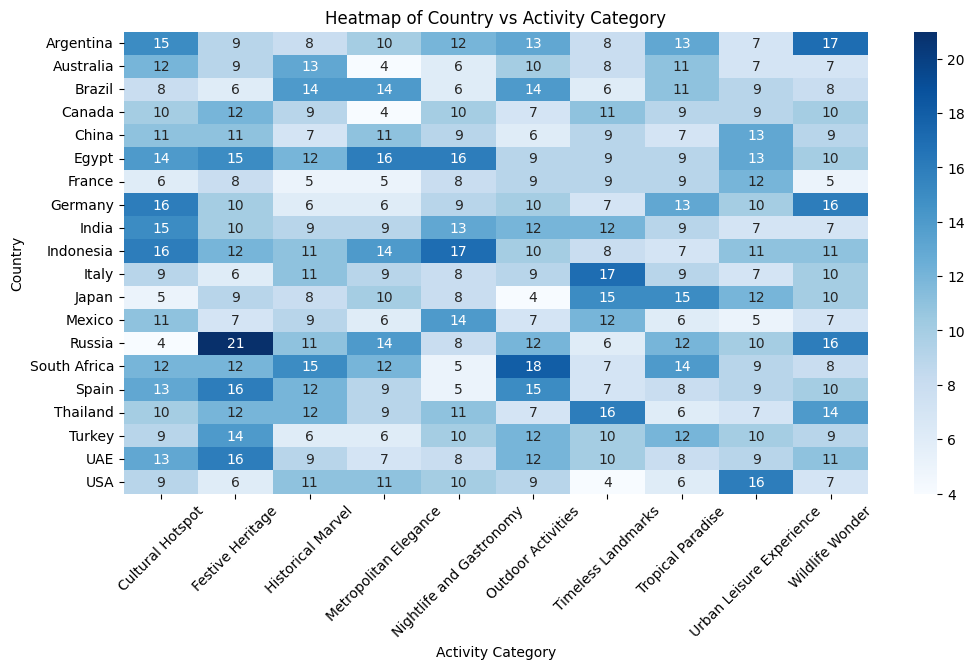

Sample Predictions:
ไป India เพื่อทำกิจกรรม: Metropolitan Elegance
ไป UAE เพื่อทำกิจกรรม: Historical Marvel
ไป Canada เพื่อทำกิจกรรม: Outdoor Activities
ไป Turkey เพื่อทำกิจกรรม: Historical Marvel
ไป Turkey เพื่อทำกิจกรรม: Nightlife and Gastronomy
ไป Egypt เพื่อทำกิจกรรม: Nightlife and Gastronomy
ไป Australia เพื่อทำกิจกรรม: Outdoor Activities
ไป South Africa เพื่อทำกิจกรรม: Outdoor Activities
ไป India เพื่อทำกิจกรรม: Cultural Hotspot
ไป Spain เพื่อทำกิจกรรม: Metropolitan Elegance


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

# Load data
file_path = "/Updated_Unique_Tourist.csv"
df = pd.read_csv(file_path)

# Select features and target
features = ["Country", "Famous Attraction", "Best Time to Visit", "Attractive Activities"]
target = "Activity Category"

# Encode categorical features using One-Hot Encoding
df_encoded = pd.get_dummies(df[features])

# Encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df[target])

# Split data
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.2, random_state=42)

# Define FNN model
model = Sequential([
    Dense(64,),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')  # 10 categories
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()


# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
predicted_labels = label_encoder.inverse_transform(y_pred_classes)
# Display some predictions
sample_size = 10
sample_indices = np.random.choice(len(X_test), sample_size, replace=False)
print("Sample Predictions:")
for idx in sample_indices:
    country = df.iloc[idx]['Country']
    activity = predicted_labels[idx]
    print(f"ไป {country} เพื่อทำกิจกรรม: {activity}")



# Create heatmap for Best Time to Visit vs Country
plt.figure(figsize=(10, 6))
pivot_table_season_country = df.pivot_table(index='Best Time to Visit', columns='Country', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table_season_country, cmap='coolwarm', annot=True, fmt="d")
plt.title('Heatmap of Best Time to Visit vs Country')
plt.xlabel('Country')
plt.ylabel('Best Time to Visit')
plt.xticks(rotation=45)
plt.show()

# Create heatmap for country vs activity category
plt.figure(figsize=(12, 6))
pivot_table = df.pivot_table(index='Country', columns='Activity Category', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, cmap='Blues', annot=True, fmt="d")
plt.title('Heatmap of Country vs Activity Category')
plt.xlabel('Activity Category')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.show()


Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.3316 - loss: 2.1745 - val_accuracy: 0.9675 - val_loss: 1.4570
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9968 - loss: 1.0187 - val_accuracy: 1.0000 - val_loss: 0.1704
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 0.1083 - val_accuracy: 1.0000 - val_loss: 0.0388
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 0.0285 - val_accuracy: 1.0000 - val_loss: 0.0175
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 0.0138 - val_accuracy: 1.0000 - val_loss: 0.0101
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.0000 - loss: 0.0081 - val_accuracy: 1.0000 - val_loss: 0.0067
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 0.0055 - val_accuracy: 1.0000 - val_loss: 0.0047
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 0.0040 - val_accuracy: 1

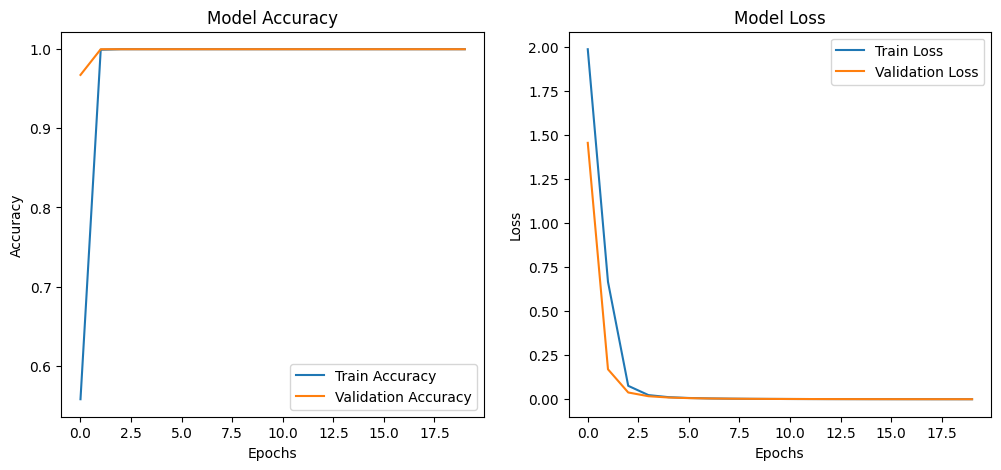

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Sample Predictions:
ไป Turkey เพื่อทำกิจกรรม: Nightlife and Gastronomy
ไป Australia เพื่อทำกิจกรรม: Festive Heritage
ไป China เพื่อทำกิจกรรม: Cultural Hotspot
ไป Italy เพื่อทำกิจกรรม: Historical Marvel
ไป Spain เพื่อทำกิจกรรม: Outdoor Activities
ไป Brazil เพื่อทำกิจกรรม: Festive Heritage
ไป Thailand เพื่อทำกิจกรรม: Wildlife Wonder
ไป Indonesia เพื่อทำกิจกรรม: Historical Marvel
ไป Germany เพื่อทำกิจกรรม: Wildlife Wonder
ไป Turkey เพื่อทำกิจกรรม: Nightlife and Gastronomy


ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1000x600 with 0 Axes>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Load data
file_path = "/Updated_Unique_Tourist.csv"
df = pd.read_csv(file_path)

# Assuming 'Best Time to Visit' contains month names or seasons, we need to map it to months
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12,
    # If using seasons, you can map them to a range of months
    'Spring': [3, 4, 5], 'Summer': [6, 7, 8], 'Fall': [9, 10, 11], 'Winter': [12, 1, 2]
}

# Map 'Best Time to Visit' to month(s)
df['Best Time to Visit'] = df['Best Time to Visit'].map(month_map)

# For rows where the Best Time to Visit is a season (e.g. 'Spring'), we'll use multiple columns
for month in range(1, 13):
    df[f'Month_{month}'] = df['Best Time to Visit'].apply(lambda x: 1 if isinstance(x, list) and month in x else (1 if x == month else 0))

# Create a separate dataframe for the heatmap
heatmap_df = df.copy()

# Drop the old 'Best Time to Visit' column after transforming
df = df.drop(columns=['Best Time to Visit'])

# Select features and target
features = ["Country", "Famous Attraction", "Attractive Activities"] + [f'Month_{month}' for month in range(1, 13)]
target = "Activity Category"

# Encode categorical features using One-Hot Encoding
df_encoded = pd.get_dummies(df[features])

# Encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df[target])

# Ensure that all data is in numeric format
X = df_encoded.values  # This ensures that the data is passed as a NumPy array

# Check if there are any non-numeric values in X and y
if not np.issubdtype(X.dtype, np.number):
    print("Warning: The feature data contains non-numeric values. Converting them to numeric...")
    X = X.astype(np.float32)  # Force conversion to float32 for model input

if not np.issubdtype(y.dtype, np.number):
    print("Warning: The target data contains non-numeric values. Converting them to numeric...")
    y = y.astype(np.int32)  # Ensure target is in integer format for classification

# Check for missing values in the features and target
if np.any(np.isnan(X)) or np.any(np.isnan(y)):
    print("Warning: Missing values detected. Filling missing values...")
    X = np.nan_to_num(X)  # Replace NaNs with 0s in the feature data
    y = np.nan_to_num(y)  # Replace NaNs with 0s in the target data

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define FNN model with an Input layer to avoid the warning message
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Use Input layer instead of input_dim
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')  # 10 categories
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
predicted_labels = label_encoder.inverse_transform(y_pred_classes)

# Display some predictions
sample_size = 10
sample_indices = np.random.choice(len(X_test), sample_size, replace=False)
print("Sample Predictions:")
for idx in sample_indices:
    country = df.iloc[idx]['Country']
    activity = predicted_labels[idx]
    print(f"ไป {country} เพื่อทำกิจกรรม: {activity}")

# Create heatmap for Best Time to Visit vs Country
plt.figure(figsize=(10, 6))
pivot_table_season_country = heatmap_df.pivot_table(index='Best Time to Visit', columns='Country', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table_season_country, cmap='coolwarm', annot=True, fmt="d")
plt.title('Heatmap of Best Time to Visit vs Country')
plt.xlabel('Country')
plt.ylabel('Best Time to Visit')
plt.xticks(rotation=45)
plt.show()

# Create heatmap for country vs activity category
plt.figure(figsize=(12, 6))
pivot_table = df.pivot_table(index='Country', columns='Activity Category', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, cmap='Blues', annot=True, fmt="d")
plt.title('Heatmap of Country vs Activity Category')
plt.xlabel('Activity Category')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.show()


In [ ]:
print(heatmap_df['Best Time to Visit'].unique())
print(heatmap_df[['Best Time to Visit', 'Country']].head())


[nan]
  Best Time to Visit Country
0                NaN  France
1                NaN   Spain
2                NaN   Japan
3                NaN  Turkey
4                NaN   China
